In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import datetime as dt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [3]:
data = pd.read_csv('/Volumes/Seagate Backup Plus Drive/time_series_eg/relative_price_change_CTtoBS_table.csv')

In [4]:
data['date'] = pd.to_datetime(data['date'])
X = data['date'].to_list()

In [5]:
def conv(array):
    XX = []
    for i in range(len(array)):
        conv = toYearFraction(array[i])
        XX.append(conv)
    return np.array(XX)
X2 = conv(X)  

In [6]:
X2 -= X2[0]
X2 = X2[::,None] # convert a row vector to column vector
y = data['relative_price_change_CTtoBS']
y = y.values 
y = y[::,None]

In [7]:
##apply linear regression

reg = LinearRegression().fit(X2,y)
slope = reg.coef_[0][0] ##slope of the line
intercept = reg.intercept_[0]
print('slope', slope)
print('intercept',intercept)
fittedline = slope*X2 + intercept
fittedline = fittedline.flatten()

slope 0.1382110476853653
intercept 0.9938099917717538


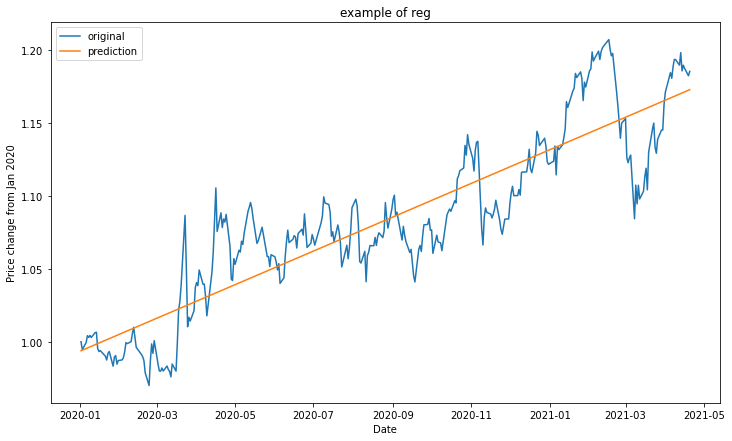

In [8]:
##make graph

fig,ax = plt.subplots(1,1,figsize = (12,7))
ax.plot(data['date'],data['relative_price_change_CTtoBS'],label = 'original')
ax.plot(data['date'],fittedline,label = 'prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Price change from Jan 2020')
ax.set_title('example of reg')
ax.legend(loc = 'best')


In [9]:
from dateutil.parser import parse
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
                 ,parse_dates=['date'])

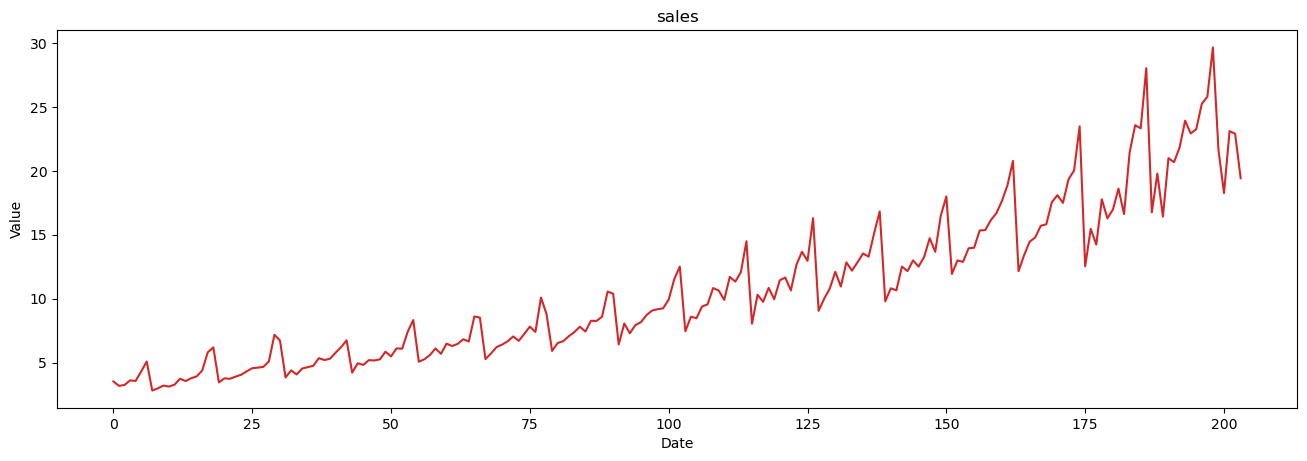

In [10]:
#visualizing
def plot_df(df,x,y,title = '', xlabel = 'Date',ylabel = 'Value',dpi = 100):
    plt.figure(figsize = (16,5), dpi = dpi)
    plt.plot(x,y,color = 'tab:red')
    plt.gca().set(title = title,xlabel = xlabel,ylabel =ylabel)
    plt.show()
    
    
plot_df(df, x = df.index, y = df.value,
       title= 'sales')

In [11]:
##decompose a time series
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

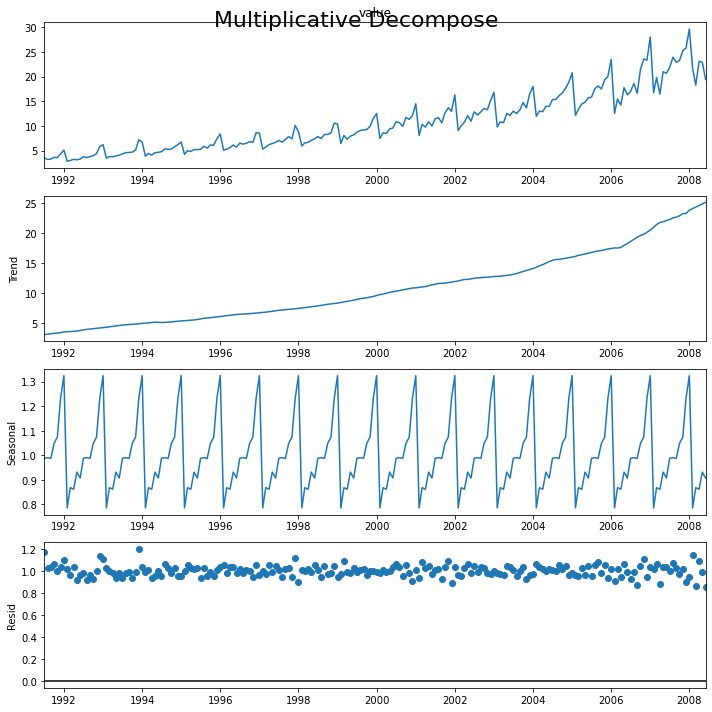

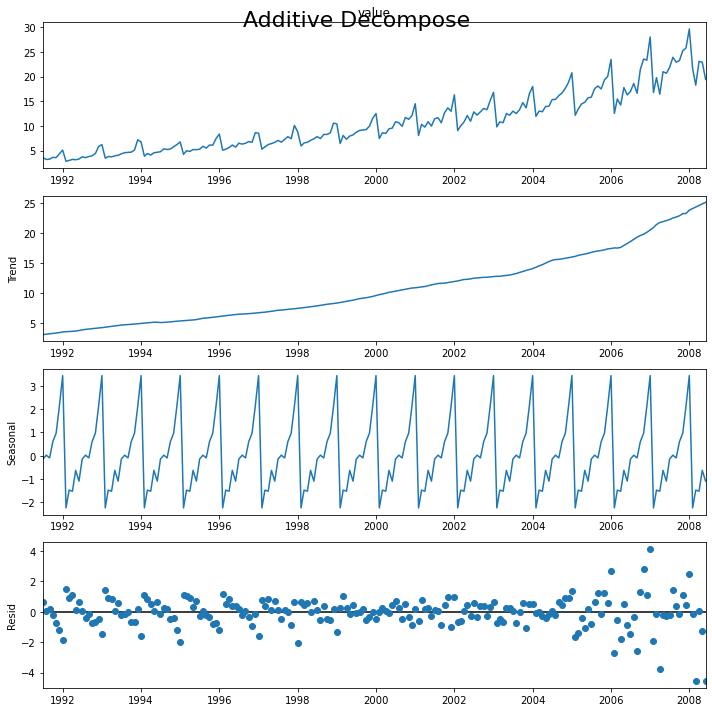

In [12]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [13]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


In [14]:
## testing the stationarity 
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test null hypo is time series is non stationary
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067283
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [15]:
# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 2.013126
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/Applications/miniconda3/envs/icclim/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<AxesSubplot:title={'center':'Random White Noise'}>

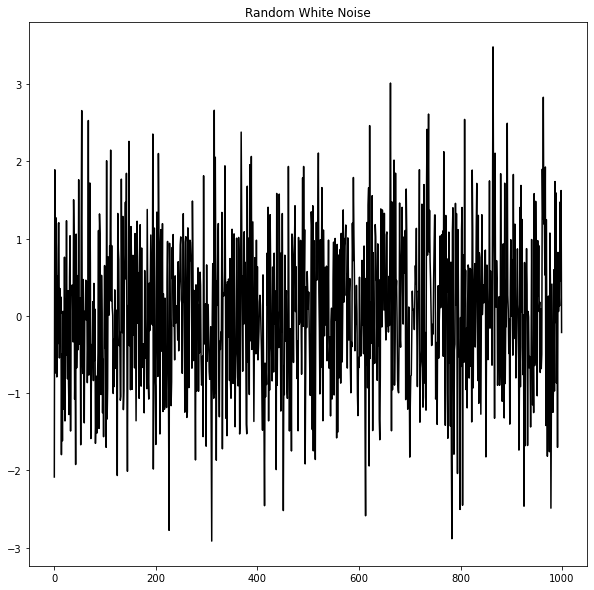

In [16]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

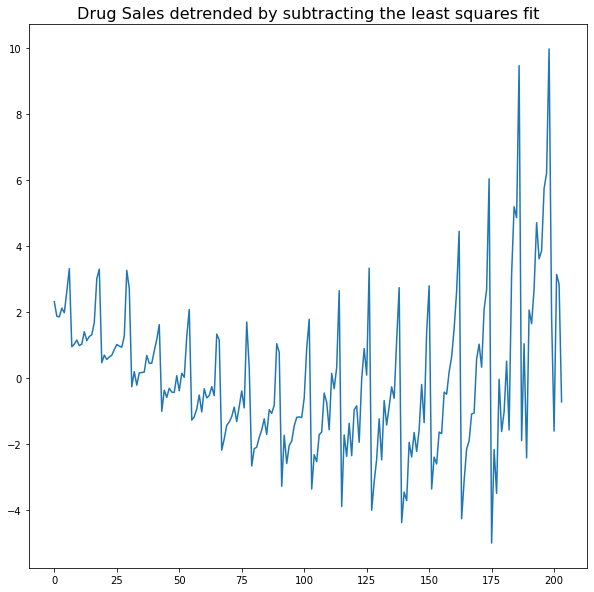

In [17]:
##removing the trend
# Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

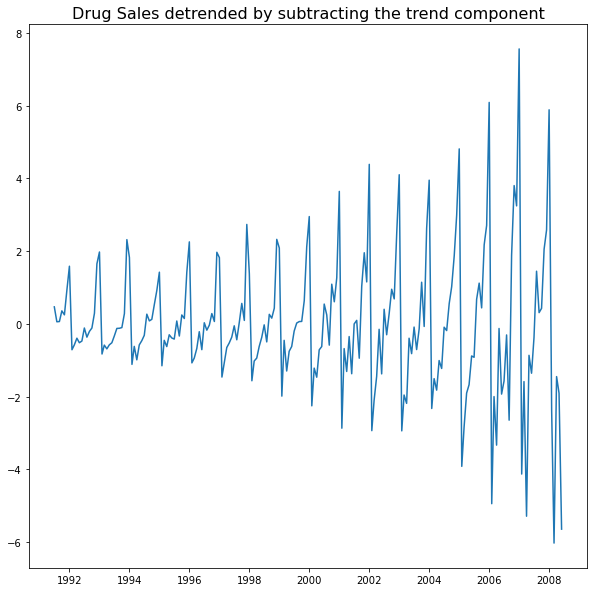

In [18]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

[]

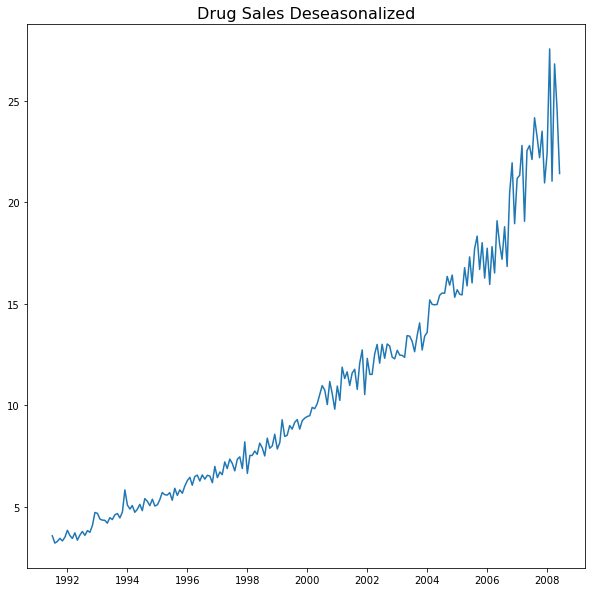

In [19]:
#deseasonalize a time serires
#1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

#2. Seasonal difference the series (subtract the value of previous season from the current value)

#3. Divide the series by the seasonal index obtained from STL decomposition


# Subtracting the Trend Component.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()